In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read in output file from cleaning notebook
df = pd.read_csv('../data/average_station_traffic.csv')
del df['Unnamed: 0']

In [3]:
# rename dates to short day/time - makes graphs easier to read
df['Short_Day'] = df.apply(lambda x: x['Day'][:3], axis=1)
df['Short_Time'] = df.apply(
    lambda x: x['Time_Range'][:2] + ' to ' + x['Time_Range'][9:11], axis=1)
df['Short_Time_Range'] = df.apply(
    lambda x: x['Short_Day'] + "  " + x['Short_Time'], axis=1)

In [4]:
# find top 10 stations for just one time range
df3 = df.query('Short_Time_Range == "Thu  16 to 20"').copy()
df3.sort_values('Total_Traffic', ascending=False, inplace=True)
df_top10 = df3.iloc[:11]

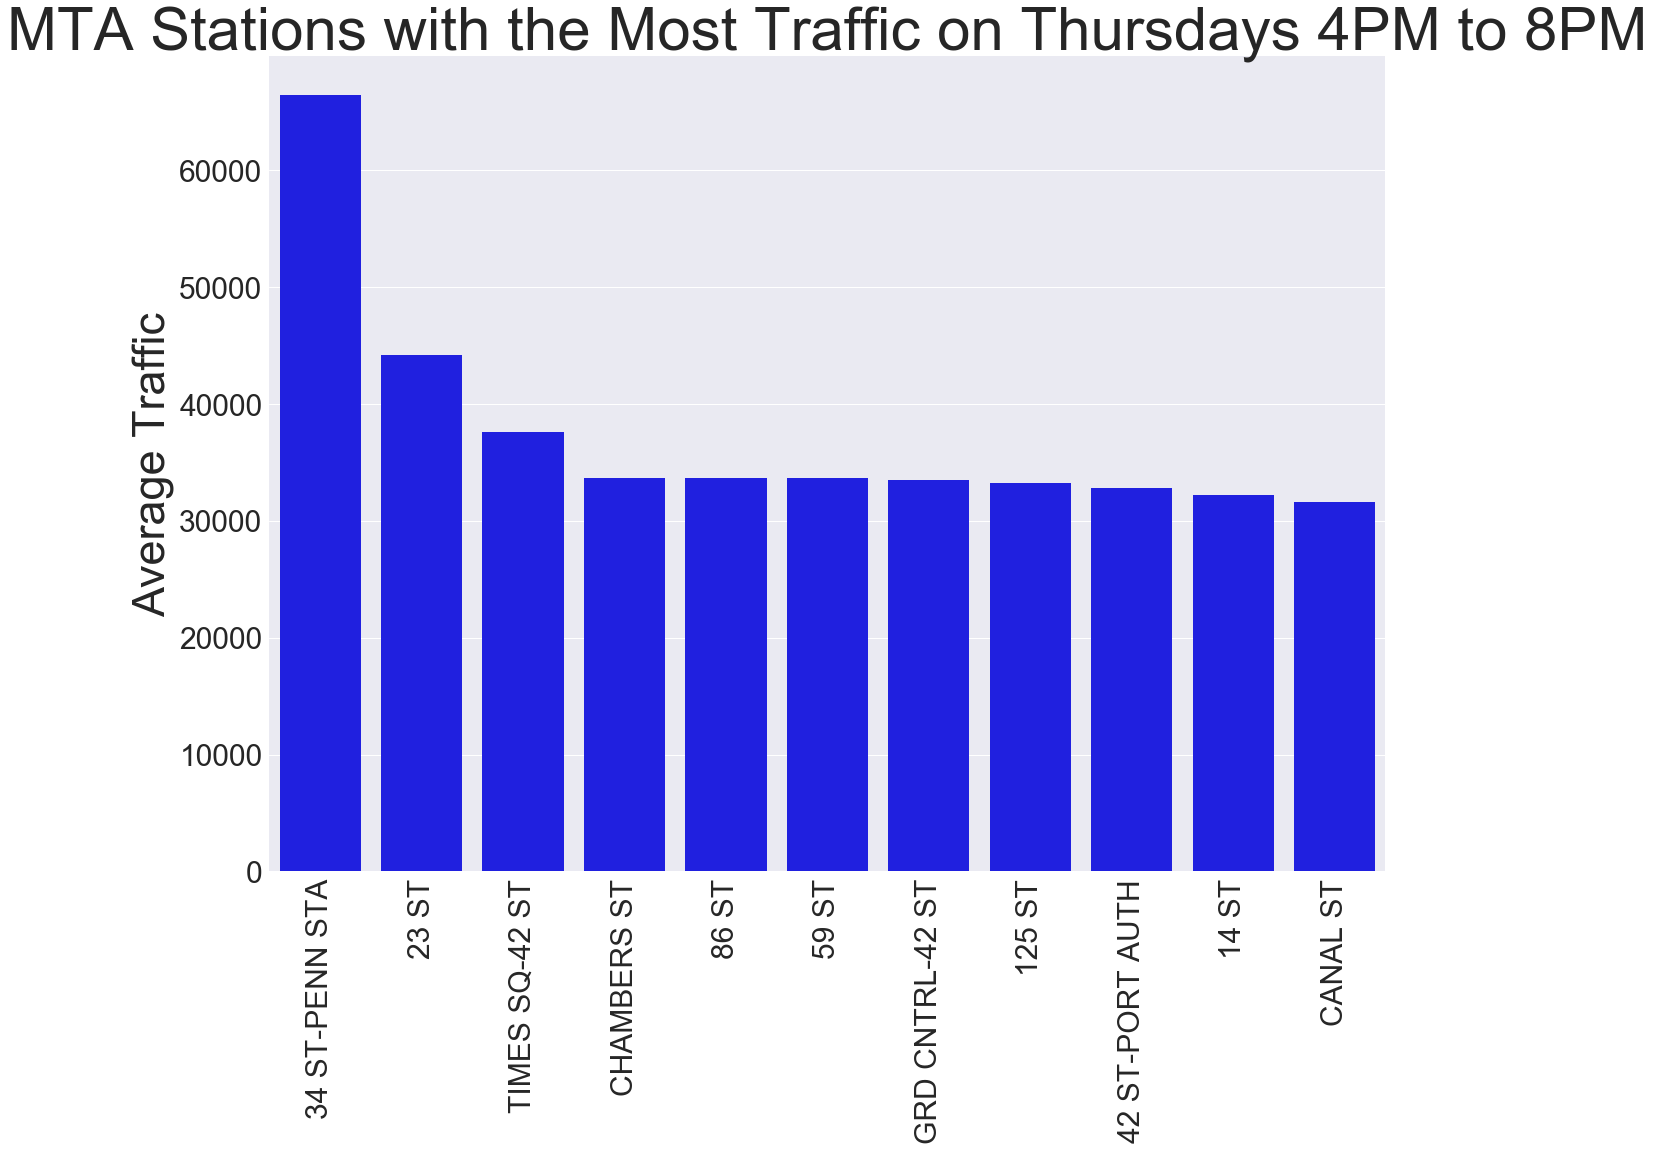

In [6]:
# plot the final output data
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.set(font_scale=3)

fig = sns.barplot(x=df_top10['STATION'],
                  y=df_top10['Total_Traffic'], color='b')
fig.set_title("MTA Stations with the Most Traffic on Thursdays 4PM to 8PM",
              fontsize=60)
ax.set_xticklabels(df_top10['STATION'], rotation=90)
ax.set_xlabel('', fontsize=35)
ax.set_ylabel('Average Traffic', fontsize=45);